##### Load Required libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set_style('darkgrid')

### Load the data

In [3]:
import os
os.getcwd()
os.listdir()

'C:\\Users\\Devi Vara Prasad\\Desktop\\Innomatics\\Projects\\HR_Analytics - Classification'

['.ipynb_checkpoints',
 'H.R. Analytics.pdf',
 'HR_Analytics_Classification.ipynb',
 'test.csv',
 'train.csv']

In [23]:
data=pd.read_csv(r'C:\\Users\\Devi Vara Prasad\\Desktop\\Innomatics\\Projects\\HR_Analytics - Classification\train.csv')
test=pd.read_csv(r'C:\\Users\\Devi Vara Prasad\\Desktop\\Innomatics\\Projects\\HR_Analytics - Classification\test.csv')

In [6]:
data.shape
data.head()
# Training data

(54808, 14)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [7]:
test.shape
test.head()
# testing data 

(23490, 13)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


### EDA
#### Dataset level

In [49]:
data.info()
data.isnull().sum()
data.describe().transpose()
data.columns
cols=data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
KPIs_met >80%,54808.0,0.351974,0.477590,0.0,0.00,0.0,1.0,1.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [21]:
cat_cols=data.select_dtypes(['object']).columns
num_cols=data.select_dtypes(['number']).columns
# selecting columns with categorical and numerical data types for future use.

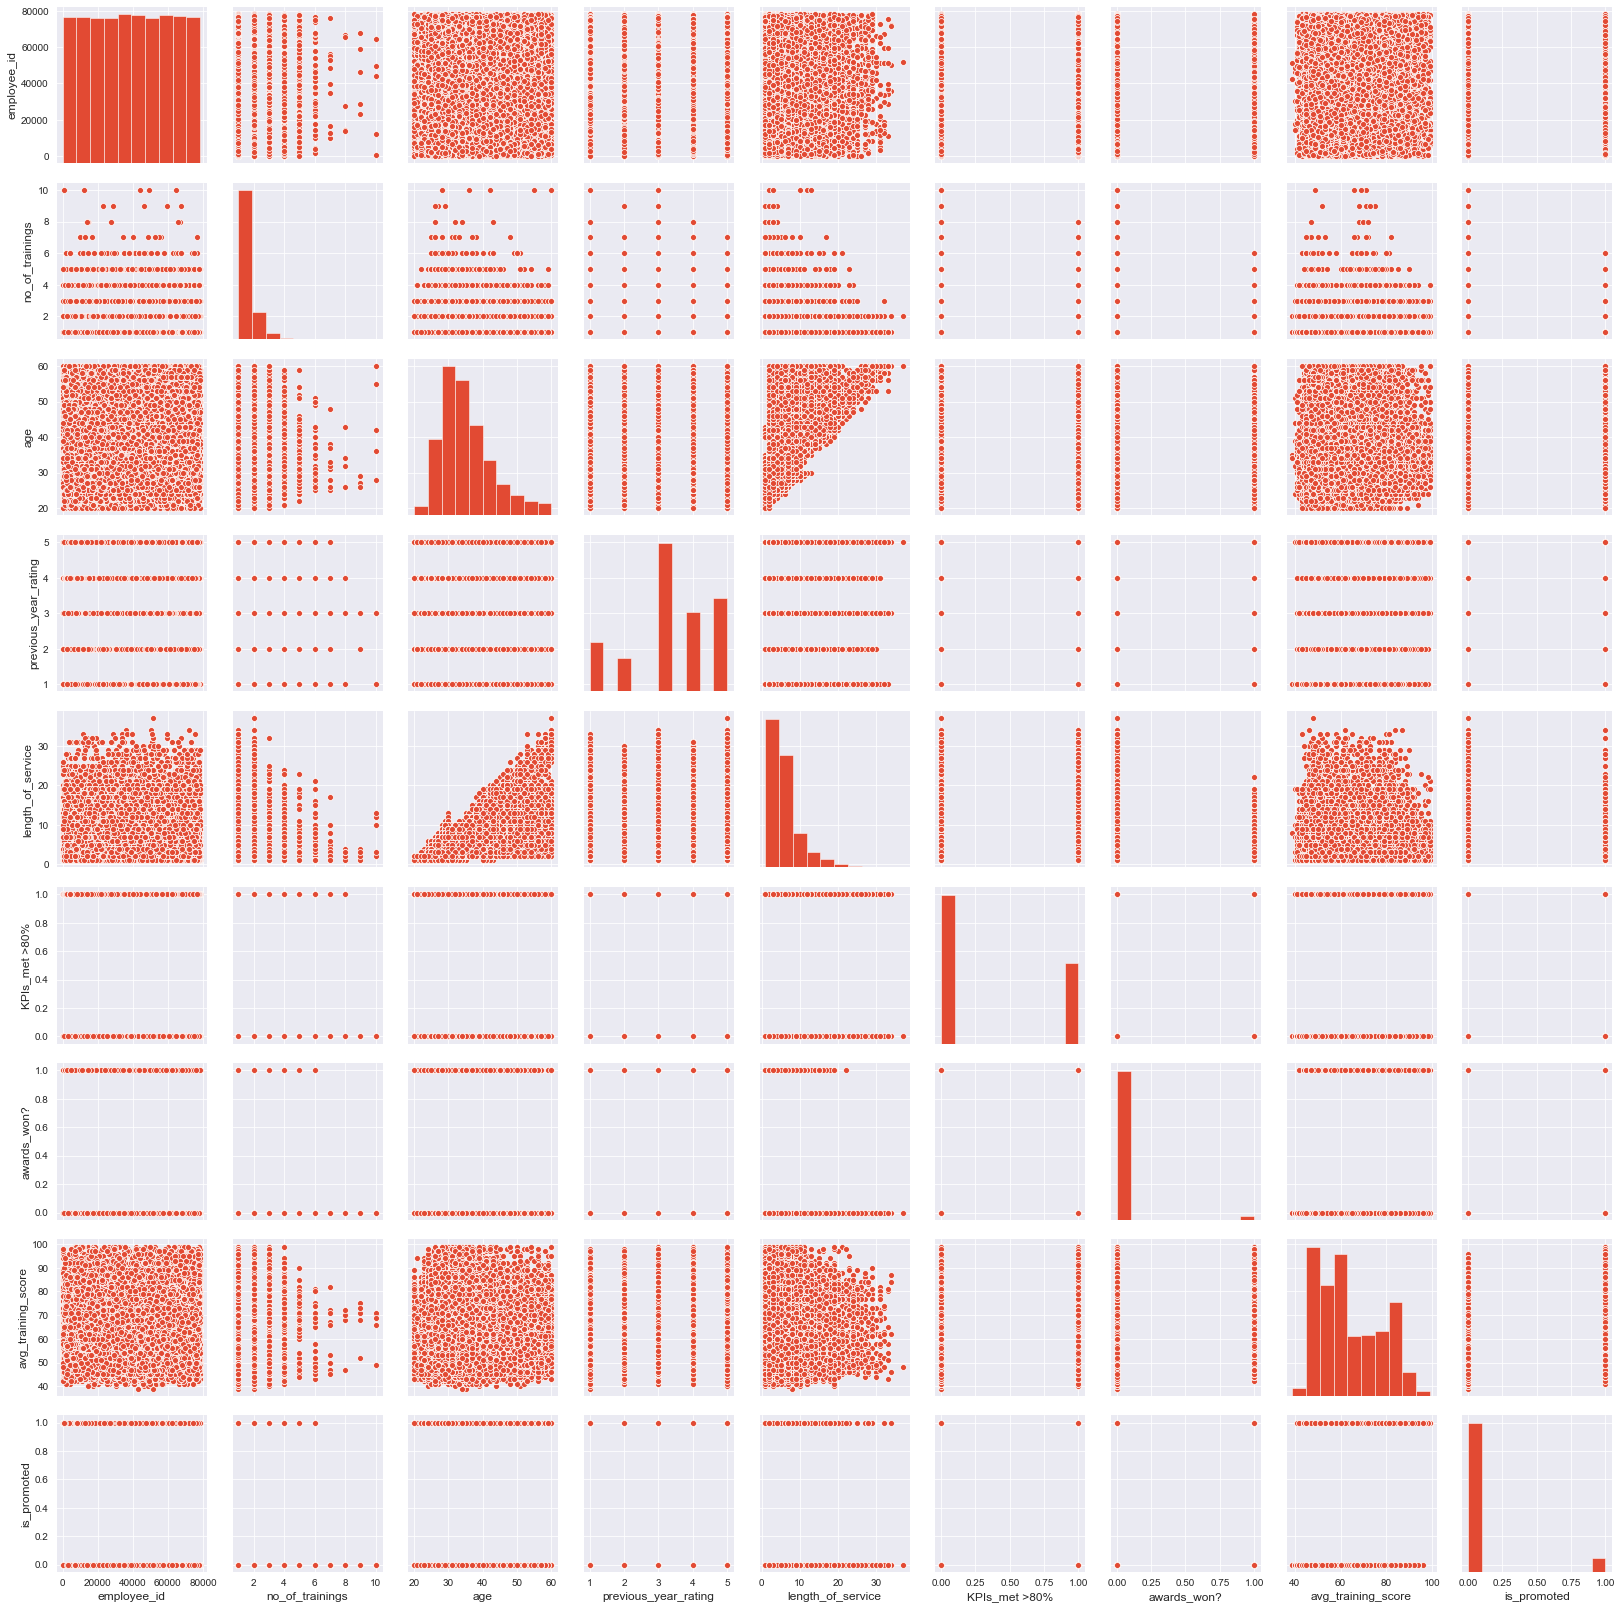

In [109]:
sns.pairplot(data);

<Figure size 864x504 with 0 Axes>

(10.0, 0.0)

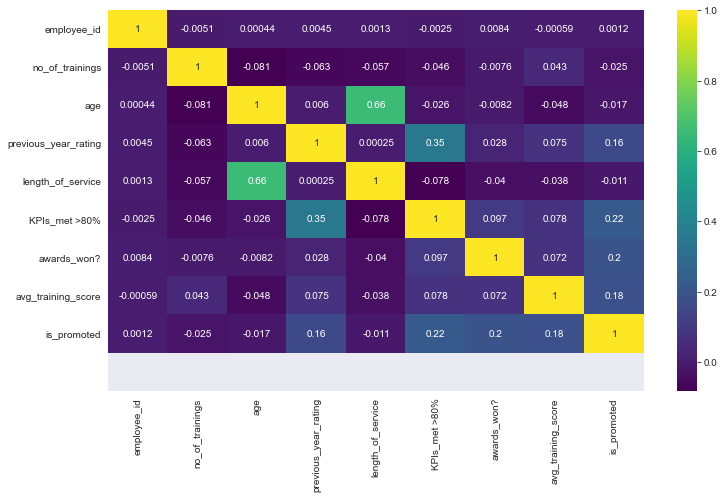

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True, cmap='viridis');
plt.ylim(10, 0)

### w.r.t columns (EDA)

### is_promoted

In [17]:
data.corr()['is_promoted'].sort_values(ascending=False)
# There is no strong relationship for target variable with predictors. 

is_promoted             1.000000
KPIs_met >80%           0.221582
awards_won?             0.195871
avg_training_score      0.181147
previous_year_rating    0.159320
employee_id             0.001206
length_of_service      -0.010670
age                    -0.017166
no_of_trainings        -0.024896
Name: is_promoted, dtype: float64

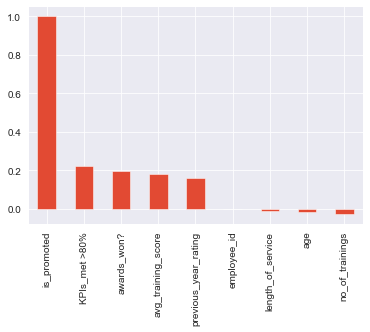

In [28]:
data.corr()['is_promoted'].sort_values(ascending=False).plot(kind='bar');

### eduction

In [33]:
data.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [43]:
data.groupby('education').mean()['age']
# we can use this data to impute the missing values

education
Bachelor's          33.445226
Below Secondary     23.836025
Master's & above    39.352630
Name: age, dtype: float64

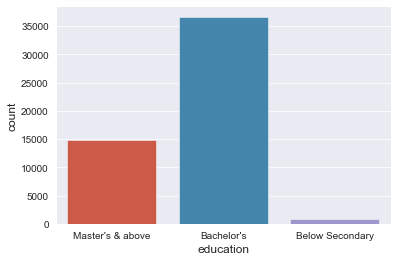

In [66]:
sns.countplot(data[data.notna()]['education']);

In [133]:
data.groupby(['education','is_promoted']).count()

employee_id  department  region  gender  \
education        is_promoted                                            
Bachelor's       0                  33661       33661   33661   33661   
                 1                   3008        3008    3008    3008   
Below Secondary  0                    738         738     738     738   
                 1                     67          67      67      67   
Master's & above 0                  13454       13454   13454   13454   
                 1                   1471        1471    1471    1471   

                              recruitment_channel  no_of_trainings    age  \
education        is_promoted                                                
Bachelor's       0                          33661            33661  33661   
                 1                           3008             3008   3008   
Below Secondary  0                            738              738    738   
                 1                             67               67     67   
Master's & above 0                          13454            13454  13454   
                 1                           1471             1471   1471   

                              previous_year_rating  length_of_service  \
education        is_promoted                                            
Bachelor's       0                           30671              33661   
                 1                            2733               3008   
Below Secondary  0                             422                738   
                 1                              36                 67   
Master's & above 0                           13335              13454   
                 1                            1463               1471   

                              KPIs_met >80%  awards_won?  avg_training_score  
education        is_promoted                                                  
Bachelor's       0                    33661        33661               33661  
                 1                     3008         3008                3008  
Below Secondary  0                      738          738                 738  
                 1                       67           67                  67  
Master's & above 0                    13454        13454               13454  
                 1                     1471         1471                1471

In [141]:
data.groupby(['education']).count()['is_promoted'].sort_values(ascending=False).index
education_count_order=data.groupby(['education']).count()['is_promoted'].sort_values(ascending=False).index

Index(['Bachelor's', 'Master's & above', 'Below Secondary'], dtype='object', name='education')

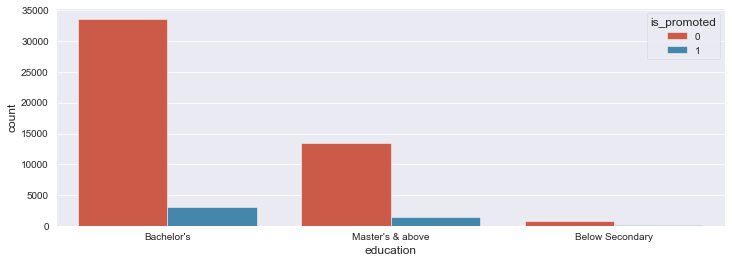

In [142]:
plt.figure(figsize=(12,4))
sns.countplot(data['education'],order=education_count_order,hue=data['is_promoted']);
# employees with Bachelor's and Master's & above have more change of getting promoted

**employees with Bachelor's and Master's & above have more change of getting promoted**

### previous_year_rating

In [35]:
data.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [47]:
data.groupby('previous_year_rating').mean()['KPIs_met >80%']
# we can use this data to impute the missing values

previous_year_rating
1.0    0.128395
2.0    0.182012
3.0    0.258245
4.0    0.402754
5.0    0.638361
Name: KPIs_met >80%, dtype: float64

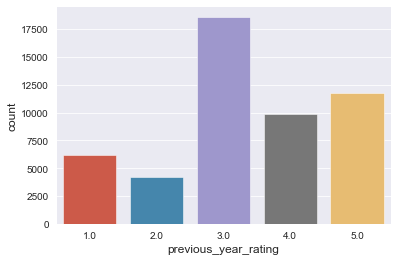

In [69]:
sns.countplot(data[data.notna()]['previous_year_rating']);

In [143]:
data.groupby(['previous_year_rating','is_promoted']).count()

employee_id  department  region  education  \
previous_year_rating is_promoted                                               
1.0                  0                   6135        6135    6135       5801   
                     1                     88          88      88         86   
2.0                  0                   4044        4044    4044       3856   
                     1                    181         181     181        179   
3.0                  0                  17263       17263   17263      16542   
                     1                   1355        1355    1355       1325   
4.0                  0                   9093        9093    9093       8742   
                     1                    784         784     784        767   
5.0                  0                   9820        9820    9820       9487   
                     1                   1921        1921    1921       1875   

                                  gender  recruitment_channel  \
previous_year_rating is_promoted                                
1.0                  0              6135                 6135   
                     1                88                   88   
2.0                  0              4044                 4044   
                     1               181                  181   
3.0                  0             17263                17263   
                     1              1355                 1355   
4.0                  0              9093                 9093   
                     1               784                  784   
5.0                  0              9820                 9820   
                     1              1921                 1921   

                                  no_of_trainings    age  length_of_service  \
previous_year_rating is_promoted                                              
1.0                  0                       6135   6135               6135   
                     1                         88     88                 88   
2.0                  0                       4044   4044               4044   
                     1                        181    181                181   
3.0                  0                      17263  17263              17263   
                     1                       1355   1355               1355   
4.0                  0                       9093   9093               9093   
                     1                        784    784                784   
5.0                  0                       9820   9820               9820   
                     1                       1921   1921               1921   

                                  KPIs_met >80%  awards_won?  \
previous_year_rating is_promoted                               
1.0                  0                     6135         6135   
                     1                       88           88   
2.0                  0                     4044         4044   
                     1                      181          181   
3.0                  0                    17263        17263   
                     1                     1355         1355   
4.0                  0                     9093         9093   
                     1                      784          784   
5.0                  0                     9820         9820   
                     1                     1921         1921   

                                  avg_training_score  
previous_year_rating is_promoted                      
1.0                  0                          6135  
                     1                            88  
2.0                  0                          4044  
                     1                           181  
3.0                  0                         17263  
                     1                          1355  
4.0                  0                          9093  
                     1                           784  
5.0                  0  

In [147]:
data.groupby(['previous_year_rating']).count()['is_promoted'].sort_values(ascending=False).index
rating_count_order=data.groupby(['previous_year_rating']).count()['is_promoted'].sort_values(ascending=False).index

Float64Index([3.0, 5.0, 4.0, 1.0, 2.0], dtype='float64', name='previous_year_rating')

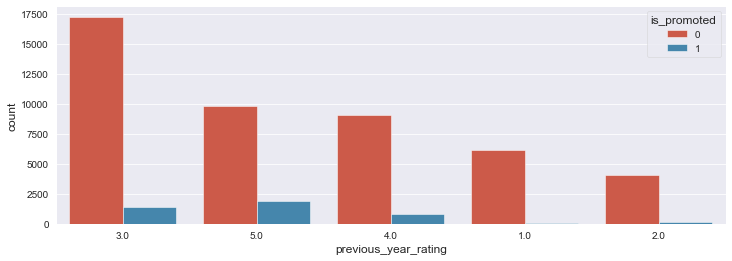

In [148]:
plt.figure(figsize=(12,4))
sns.countplot(data['previous_year_rating'],order=rating_count_order,hue=data['is_promoted']);

**Employees with 3 and 5 rating got more promotions**

### department

In [73]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [84]:
data.groupby('department').count()['is_promoted'].sort_values()

department
R&D                    999
Legal                 1039
HR                    2418
Finance               2536
Analytics             5352
Procurement           7138
Technology            7138
Operations           11348
Sales & Marketing    16840
Name: is_promoted, dtype: int64

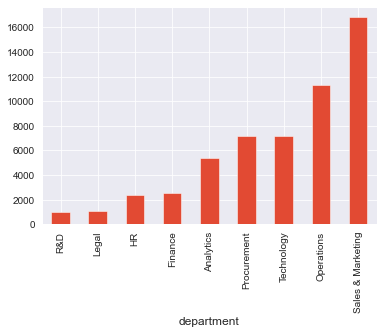

In [117]:
data.groupby(['department']).count()['is_promoted'].sort_values().plot(kind='bar')

In [118]:
data.groupby(['department','is_promoted']).count()

employee_id  region  education  gender  \
department        is_promoted                                           
Analytics         0                   4840    4840       4529    4840   
                  1                    512     512        486     512   
Finance           0                   2330    2330       2294    2330   
                  1                    206     206        206     206   
HR                0                   2282    2282       2251    2282   
                  1                    136     136        135     136   
Legal             0                    986     986        982     986   
                  1                     53      53         53      53   
Operations        0                  10325   10325      10106   10325   
                  1                   1023    1023       1016    1023   
Procurement       0                   6450    6450       6379    6450   
                  1                    688     688        687     688   
R&D               0                    930     930        904     930   
                  1                     69      69         67      69   
Sales & Marketing 0                  15627   15627      14129   15627   
                  1                   1213    1213       1136    1213   
Technology        0                   6370    6370       6279    6370   
                  1                    768     768        760     768   

                               recruitment_channel  no_of_trainings    age  \
department        is_promoted                                                
Analytics         0                           4840             4840   4840   
                  1                            512              512    512   
Finance           0                           2330             2330   2330   
                  1                            206              206    206   
HR                0                           2282             2282   2282   
                  1                            136              136    136   
Legal             0                            986              986    986   
                  1                             53               53     53   
Operations        0                          10325            10325  10325   
                  1                           1023             1023   1023   
Procurement       0                           6450             6450   6450   
                  1                            688              688    688   
R&D               0                            930              930    930   
                  1                             69               69     69   
Sales & Marketing 0                          15627            15627  15627   
                  1                           1213             1213   1213   
Technology        0                           6370             6370   6370   
                  1                            768              768    768   

                               previous_year_rating  length_of_service  \
department        is_promoted                                            
Analytics         0                            4418               4840   
                  1                             468                512   
Finance           0                            2071               2330   
                  1                             182                206   
HR                0                            2050               2282   
                  1                             122                136   
Legal             0                             829                986   
                  1                              42                 53   
Operations        0                            9774              10325   
                  1                             986               1023   
Procurement       0                            6057               6450   
                  1                            

In [149]:
data.groupby(['department']).count()['is_promoted'].sort_values(ascending=False).index
count_order=data.groupby(['department']).count()['is_promoted'].sort_values(ascending=False).index

Index(['Sales & Marketing', 'Operations', 'Technology', 'Procurement',
       'Analytics', 'Finance', 'HR', 'Legal', 'R&D'],
      dtype='object', name='department')

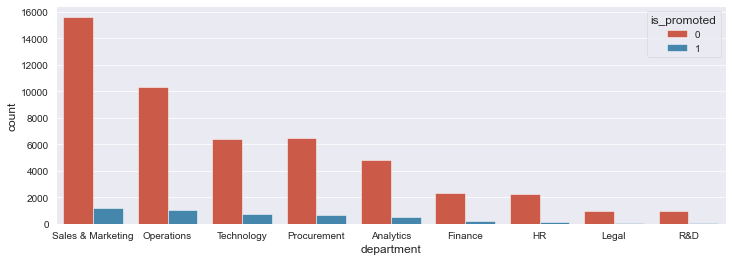

In [150]:
plt.figure(figsize=(12,4))
sns.countplot(data['department'],order=count_order,hue=data['is_promoted']);
# we cannot find a big difference in the no of ppl promoted from each department. 

**we cannot find a big difference in the no of ppl promoted from each department.**

### region

In [90]:
data['region'].nunique()
# there are many unique values in this column. 

34

In [94]:
data.groupby('region').count()['is_promoted'].sort_values()
# holding this variable for further investigation.

region
region_18       31
region_33      269
region_34      292
region_3       346
region_21      411
region_9       420
region_12      500
region_24      508
region_1       610
region_10      648
region_8       655
region_30      657
region_6       690
region_5       766
region_17      796
region_25      819
region_14      827
region_20      850
region_19      874
region_32      945
region_29      994
region_23     1175
region_11     1315
region_28     1318
region_16     1465
region_27     1659
region_4      1703
region_31     1935
region_26     2260
region_13     2648
region_15     2808
region_7      4843
region_22     6428
region_2     12343
Name: is_promoted, dtype: int64

### gender

In [97]:
data['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

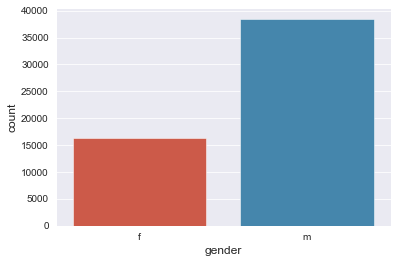

In [99]:
sns.countplot(data['gender']);

In [105]:
data.groupby('gender').describe()

employee_id                                                      \
             count          mean           std  min       25%      50%   
gender                                                                   
f          16312.0  39249.336439  22553.679762  2.0  19752.50  39165.5   
m          38496.0  39173.158484  22600.762995  1.0  19623.25  39249.0   

                          no_of_trainings            ... avg_training_score  \
             75%      max           count      mean  ...                75%   
gender                                               ...                      
f       58794.25  78298.0         16312.0  1.173921  ...               73.0   
m       58708.50  78294.0         38496.0  1.286523  ...               77.0   

             is_promoted                                               
         max       count      mean       std  min  25%  50%  75%  max  
gender                                                                 
f       99.0     16312.0  0.089934  0.286096  0.0  0.0  0.0  0.0  1.0  
m       99.0     38496.0  0.083151  0.276115  0.0  0.0  0.0  0.0  1.0  

[2 rows x 72 columns]

In [112]:
data[(data['gender']=='m') & (data['is_promoted']==1)]

employee_id             3201
department              3201
region                  3201
education               3093
gender                  3201
recruitment_channel     3201
no_of_trainings         3201
age                     3201
previous_year_rating    2954
length_of_service       3201
KPIs_met >80%           3201
awards_won?             3201
avg_training_score      3201
is_promoted             3201
dtype: int64

In [146]:
data.groupby(['gender','is_promoted']).count()

employee_id  department  region  education  \
gender is_promoted                                               
f      0                  14845       14845   14845      14468   
       1                   1467        1467    1467       1453   
m      0                  35295       35295   35295      33385   
       1                   3201        3201    3201       3093   

                    recruitment_channel  no_of_trainings    age  \
gender is_promoted                                                
f      0                          14845            14845  14845   
       1                           1467             1467   1467   
m      0                          35295            35295  35295   
       1                           3201             3201   3201   

                    previous_year_rating  length_of_service  KPIs_met >80%  \
gender is_promoted                                                           
f      0                           13779              14845          14845   
       1                            1375               1467           1467   
m      0                           32576              35295          35295   
       1                            2954               3201           3201   

                    awards_won?  avg_training_score  
gender is_promoted                                   
f      0                  14845               14845  
       1                   1467                1467  
m      0                  35295               35295  
       1                   3201                3201

In [151]:
data.groupby(['gender']).count()['is_promoted'].sort_values(ascending=False).index
count_order=data.groupby(['gender']).count()['is_promoted'].sort_values(ascending=False).index

Index(['m', 'f'], dtype='object', name='gender')

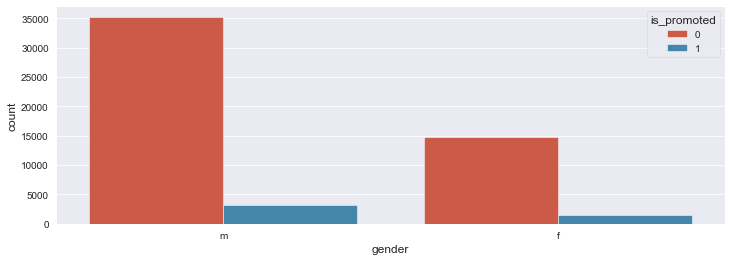

In [152]:
plt.figure(figsize=(12,4))
sns.countplot(data['gender'],order=count_order,hue=data['is_promoted']);
# we cannot find a big difference in the no of ppl promoted from each department. 

In [ ]:
# continue with eda later

In [50]:
cols

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

### Handling missing values

In [24]:
np.round(100*(data.isnull().sum()/len(data)),2).astype(str) + '%'

# education column has 4.4% of missing values
# previous_year_ratin has 7.52% of missing values

employee_id              0.0%
department               0.0%
region                   0.0%
education                4.4%
gender                   0.0%
recruitment_channel      0.0%
no_of_trainings          0.0%
age                      0.0%
previous_year_rating    7.52%
length_of_service        0.0%
KPIs_met >80%            0.0%
awards_won?              0.0%
avg_training_score       0.0%
is_promoted              0.0%
dtype: object

##### Education

In [25]:
np.round(100*(data.education.value_counts()/len(data)),2).astype(str) + '%'

Bachelor's           66.9%
Master's & above    27.23%
Below Secondary      1.47%
Name: education, dtype: object

In [26]:
data.groupby('education').mean()['age']

education
Bachelor's          33.445226
Below Secondary     23.836025
Master's & above    39.352630
Name: age, dtype: float64

In [168]:
#data[(data['age']>=20) & (data['age']<27.5)]

In [170]:
#data[(data['age']>=27.5) & (data['age']<35)]

In [173]:
#data[(data['age']>=35) & (data['age']<=60)]

In [27]:
data['education'].fillna("Bachelor's",inplace=True)
#data.drop(list(data[data.education.isnull()].index),axis=0,inplace=True)

##### Missing data - previous_year_rating

In [28]:
np.round(100*(data.previous_year_rating.value_counts()/len(data)),2).astype(str) + '%'

3.0    33.97%
5.0    21.42%
4.0    18.02%
1.0    11.35%
2.0     7.71%
Name: previous_year_rating, dtype: object

In [29]:
data.groupby('previous_year_rating').mean()['KPIs_met >80%']

previous_year_rating
1.0    0.128395
2.0    0.182012
3.0    0.258245
4.0    0.402754
5.0    0.638361
Name: KPIs_met >80%, dtype: float64

In [30]:
data.groupby('previous_year_rating').count()['KPIs_met >80%']

previous_year_rating
1.0     6223
2.0     4225
3.0    18618
4.0     9877
5.0    11741
Name: KPIs_met >80%, dtype: int64

In [31]:
data['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

In [32]:
data[(data['previous_year_rating']<=3)&(data['KPIs_met >80%']==0)]['previous_year_rating'].mean()
data[(data['previous_year_rating']<=3)&(data['KPIs_met >80%']==1)]['previous_year_rating'].mean()

data[(data['previous_year_rating']>=3)&(data['KPIs_met >80%']==0)]['previous_year_rating'].mean()
data[(data['previous_year_rating']>=3)&(data['KPIs_met >80%']==1)]['previous_year_rating'].mean()

2.369590127809608

2.6287641154328734

3.600751408891672

4.165039002518273

In [33]:
data[data['KPIs_met >80%']==0]['previous_year_rating'].mean()
data[data['KPIs_met >80%']==1]['previous_year_rating'].mean()

3.002649611694838

3.930080116533139

In [34]:
data[data['KPIs_met >80%']==0].isnull()['previous_year_rating']
pyr=data[data['KPIs_met >80%']==0].isnull()['previous_year_rating']

1        False
2        False
3        False
4        False
5        False
         ...  
54802    False
54803    False
54804    False
54806    False
54807    False
Name: previous_year_rating, Length: 35517, dtype: bool

In [35]:
data['previous_year_rating'].fillna(3,inplace=True)
#data.drop(list(data[data.previous_year_rating.isnull()].index),axis=0,inplace=True)

In [ ]:
###########

In [36]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

##### Testing data

In [37]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [38]:
np.round(100*(test.isnull().sum()/len(data)),2).astype(str) + '%'

employee_id              0.0%
department               0.0%
region                   0.0%
education               1.89%
gender                   0.0%
recruitment_channel      0.0%
no_of_trainings          0.0%
age                      0.0%
previous_year_rating    3.31%
length_of_service        0.0%
KPIs_met >80%            0.0%
awards_won?              0.0%
avg_training_score       0.0%
dtype: object

In [39]:
np.round(100*(data.education.value_counts()/len(data)),2).astype(str) + '%'

Bachelor's           71.3%
Master's & above    27.23%
Below Secondary      1.47%
Name: education, dtype: object

In [40]:
np.round(100*(data.previous_year_rating.value_counts()/len(data)),2).astype(str) + '%'

3.0    41.49%
5.0    21.42%
4.0    18.02%
1.0    11.35%
2.0     7.71%
Name: previous_year_rating, dtype: object

In [41]:
test['previous_year_rating'].fillna(3,inplace=True)
test['education'].fillna("Bachelor's",inplace=True)

#test.drop(list(test[test.education.isnull()].index),axis=0,inplace=True)
#test.drop(list(test[test.previous_year_rating.isnull()].index),axis=0,inplace=True)

In [42]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

### Model Building

In [43]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import xgboost
from xgboost.sklearn import XGBClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# seperate IV and DV

feature_cols=['department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']

X=data[feature_cols]
y=data.is_promoted

In [45]:
X.shape
y.shape

(54808, 12)

(54808,)

In [59]:
# train test split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [47]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [51]:
cols

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [60]:
# Encode the categorical data

le=LabelEncoder()

In [61]:
cat_cols=['department','region','education', 'gender','recruitment_channel']

In [62]:
for i in cat_cols:
    X_train[i]=le.fit_transform(X_train[i])
    X_test[i]=le.transform(X_test[i])

### Model Building

In [63]:
score = []
algo = ['LogisticRegression', 'GaussianNB', 'Decision Tree', 'Random Forest', 'Ada Boost', 'XGBoost', 'SVM', 'KNN']

In [65]:
# apply different classification algorithms

# 1. Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print('\n','Logistic Regression: ', accuracy_score(y_test, pred))
pd.DataFrame(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

score.append(np.round(accuracy_score(y_test, pred),2))

print('\n', '-'*100)


# 2. Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print('\n','GaussianNB: ', accuracy_score(y_test, pred))
pd.DataFrame(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

score.append(np.round(accuracy_score(y_test, pred),2))

print('\n', '-'*100)

# 3. Decision Tree
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print('\n','DecisionTreeClassifier: ', accuracy_score(y_test, pred))
pd.DataFrame(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

score.append(np.round(accuracy_score(y_test, pred),2))

print('\n', '-'*100)

# 4. RandomForest
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print('\n','RandomForestClassifier: ', accuracy_score(y_test, pred))
pd.DataFrame(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

score.append(np.round(accuracy_score(y_test, pred),2))

print('\n', '-'*100)

# 5. Adaboost
classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

print('\n','AdaBoostClassifier: ', accuracy_score(y_test, pred))
pd.DataFrame(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

score.append(np.round(accuracy_score(y_test, pred),2))

print('\n', '-'*100)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


 Logistic Regression:  0.9180806422185732


,0,1
0,15003,55
1,1292,93


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15058
           1       0.63      0.07      0.12      1385

    accuracy                           0.92     16443
   macro avg       0.77      0.53      0.54     16443
weighted avg       0.90      0.92      0.89     16443


 ----------------------------------------------------------------------------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)


 GaussianNB:  0.914188408441282


,0,1
0,14850,208
1,1203,182


              precision    recall  f1-score   support

           0       0.93      0.99      0.95     15058
           1       0.47      0.13      0.21      1385

    accuracy                           0.91     16443
   macro avg       0.70      0.56      0.58     16443
weighted avg       0.89      0.91      0.89     16443


 ----------------------------------------------------------------------------------------------------


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


 DecisionTreeClassifier:  0.8949705041659065


,0,1
0,14068,990
1,737,648


              precision    recall  f1-score   support

           0       0.95      0.93      0.94     15058
           1       0.40      0.47      0.43      1385

    accuracy                           0.89     16443
   macro avg       0.67      0.70      0.69     16443
weighted avg       0.90      0.89      0.90     16443


 ----------------------------------------------------------------------------------------------------


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


 RandomForestClassifier:  0.9287842851061242


,0,1
0,14931,127
1,1044,341


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15058
           1       0.73      0.25      0.37      1385

    accuracy                           0.93     16443
   macro avg       0.83      0.62      0.67     16443
weighted avg       0.92      0.93      0.91     16443


 ----------------------------------------------------------------------------------------------------


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)


 AdaBoostClassifier:  0.9246487867177522


,0,1
0,14970,88
1,1151,234


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     15058
           1       0.73      0.17      0.27      1385

    accuracy                           0.92     16443
   macro avg       0.83      0.58      0.62     16443
weighted avg       0.91      0.92      0.90     16443


 ----------------------------------------------------------------------------------------------------


In [338]:
score

[0.91, 0.91, 0.89, 0.92, 0.92]

#### XGB Classifier